<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250605_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA（主成分分析）

PCA（Principal Component Analysis，主成分分析）是一種統計方法，旨在將高維度數據轉換為低維度數據，同時儘量保留數據的變異性。它通過找出數據中的「主成分」，來達到簡化數據結構的目的。

## PCA 的步驟
1. **標準化數據**  
   將數據進行標準化處理，使每個特徵具有零均值和單位方差。
2. **計算協方差矩陣**  
   衡量不同特徵之間的關聯性，協方差矩陣反映了數據集的內在結構。
3. **計算特徵值和特徵向量**  
   特徵值代表變異的大小，特徵向量則代表變異的方向。這些特徵向量是數據中最重要的方向。
4. **選擇主成分**  
   根據特徵值的大小，選擇前幾個主成分，這些主成分保留了大部分數據中的變異。
5. **轉換數據**  
   將原始數據投影到選擇的主成分上，從而減少數據的維度。

## 優點
- **降維效果顯著**  
   PCA 可以有效地減少數據的維度，同時保留大部分的數據變異性，減少計算成本。
- **去除冗餘資訊**  
   由於它通過提取主成分來壓縮數據，PCA 可以去除特徵之間的相關性和冗餘資訊，幫助提高模型效率。
- **數據可視化**  
   PCA 可以將高維數據轉換為 2D 或 3D，方便對數據進行可視化，幫助理解數據結構。
- **提高模型效能**  
   通過降維，PCA 可以減少過擬合的風險，尤其在特徵數量很多但樣本數較少時，能改善機器學習模型的性能。
- **去噪**  
   PCA 通常能夠過濾掉噪聲數據，保留主要的信號，從而增強模型的穩定性。

## 缺點
- **解釋性較差**  
   PCA 的主成分是數學上的線性組合，這些主成分通常難以直觀解釋，因此對業務理解可能不夠直觀。
- **假設線性關係**  
   PCA 假設數據中的變異性可以通過線性變換來捕捉，對於非線性數據結構的處理可能不夠有效。
- **主成分解釋不直觀**  
   雖然 PCA 可以有效地降維，但提取出來的主成分通常是原始特徵的線性組合，難以與原始特徵直接對應，解釋性差。
- **可能丟失信息**  
   儘管 PCA 保留了大部分變異性，但在降維過程中可能仍會丟失一些對特定任務有用的資訊。

## PCA 的應用
- **數據降維**：將高維數據轉換為低維數據，便於後續處理。
- **特徵提取**：提取對分類或回歸任務最有用的特徵。
- **數據可視化**：將高維數據降維至 2D 或 3D，便於可視化和理解。


PCA 通常應用於機器學習、圖像處理、模式識別等領域。

## 參考資料
* Python Data Science Handbook, Jake VanderPlas
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("../data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**這份資料有兩個問題**
- **欄位尺度不同**  
   不同欄位的數據尺度相差很大，這樣就可能導致模型分析時某些特徵的影響被過度放大或縮小。
- **欄位間有許多共變異性高**   
   不同欄位（特徵）之間存在高度的共變異性或線性相關性時，這意味著這些欄位之間可能提供了相似的資訊。因而加大了該**資訊**的強度。

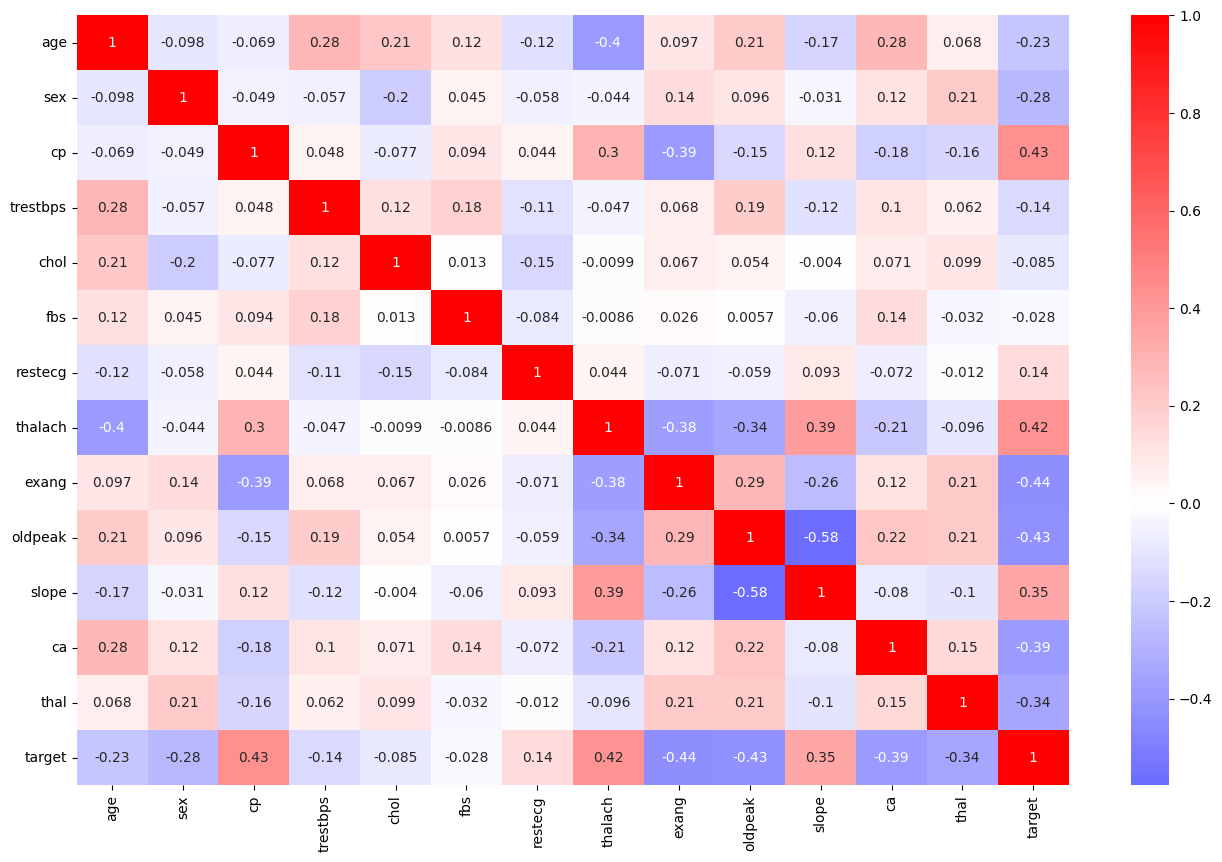

In [ ]:
data.corr()
sns.heatmap(data.corr(),annot=True,cmap='bwr',center=0)
plt.gcf().set_size_inches(16,10)

這裡舉一個極端的例子：  
如果將 `age` 這個欄位複製三次，並將其命名為三個新欄位（例如 `age2`、`age3` 和 `age4`），那麼 `age` 的影響力將被放大四倍。尤其是在KNN這類演算法。

In [ ]:
x['age2'] = x['age']
x['age3'] = x['age']
x['age4'] = x['age']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,age3,age4
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,63,63,63
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,37,37,37
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,41,41,41
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,56,56,56
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,57,57,57


### 解決欄位尺度不同的方法
解決欄位尺度不同的方法之一是使用標準差進行正規化。具體做法是：
  
  `x_new = (x - mean) / std`

這樣可以將每個特徵值轉換為以 0 為均值，標準差為 1 的標準正態分佈，從而消除不同尺度對模型訓練的影響。


In [ ]:
(x['age'] - np.mean(x['age'])) / np.std(x['age'])

0      0.952197
1     -1.915313
2     -1.474158
3      0.180175
4      0.290464
         ...   
298    0.290464
299   -1.033002
300    1.503641
301    0.290464
302    0.290464
Name: age, Length: 303, dtype: float64

In [ ]:
#使用sklearn來轉換
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# PCA的概念

很多資料的不同欄位經常會隱含著類似的概念。譬如'財富'這個隱形概念可能會包含在`學歷`、`薪水`、`不動產`、`現金存款` 等欄位的訊息中。因此我們可以給每個欄位不同的權重來加權計算並量化 `財富`,如下面的線性方程式：   
財富 = w1\*學歷 + w2\*薪水 + w3\*不動產 + w4\*現金存款

而類似`財富`這種隱含的特徵可以稱為`主成分(Principal Component)`,而線性代數中也有個類似的概念`特徵向量(Eigenvector)`。    
PCA（主成分分析）則是通過 **特徵向量（Eigenvector）** 來尋找主成分。  
PCA的目標是將高維數據投影到一個較低維的空間，同時保留數據中最多的變異性。簡單來說，PCA旨在找出數據的「主成分」，這些主成分是數據中變異最大、最能代表數據的方向。

## 特徵向量和主成分的關係

- **特徵向量（Eigenvector）**：每個特徵向量代表數據中一個方向（或者說，一個主成分的方向）。這些方向是數據變異性最大、最能表徵數據結構的方向。
- **特徵值（Eigenvalue）**：每個特徵值表示數據在對應特徵向量（主成分）方向上的變異程度。特徵值越大，表示該方向上數據的變異性越大，該主成分越重要。

## PCA的操作步驟與特徵向量
總結PCA的步驟，可以說是：

- **標準化數據**，使每個特徵的均值為0，方差為1。
- **計算協方差矩陣**，了解特徵之間的相關性。
- **計算協方差矩陣的特徵值和特徵向量**。
- **選擇具有最大特徵值的特徵向量**作為最重要的主成分，這些特徵向量表示數據中最重要的方向。
- **投影原始數據**到這些主成分上，完成降維。

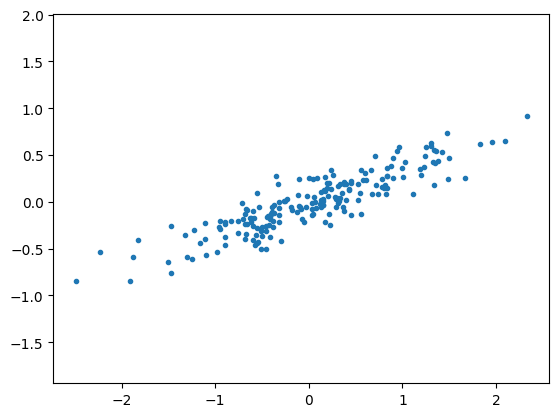

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],marker='.')
plt.axis('equal');

In [ ]:
# 計算PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
# PCA找出的主成分矩陣
print('主成分:\n', pca.components_) #Eigenvalue

# 每個座標的解釋力，越大越重要
print('\n解釋力:\n', pca.explained_variance_) #Eigenvector


主成分:
 [[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]

解釋力:
 [0.7625315 0.0184779]


### PCA的座標

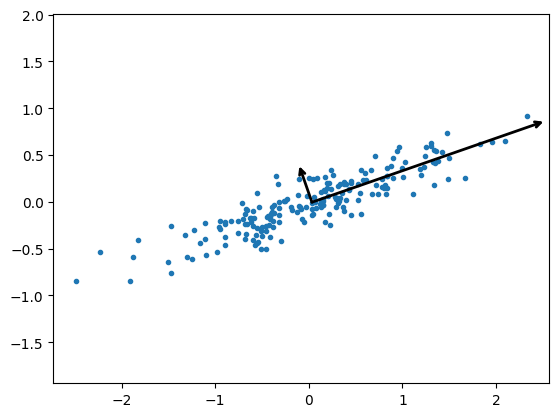

In [ ]:
#將PCA轉換後的座標軸疊在原始座標中

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1],marker='.')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### 原始座標與PCA座標的點分布差異

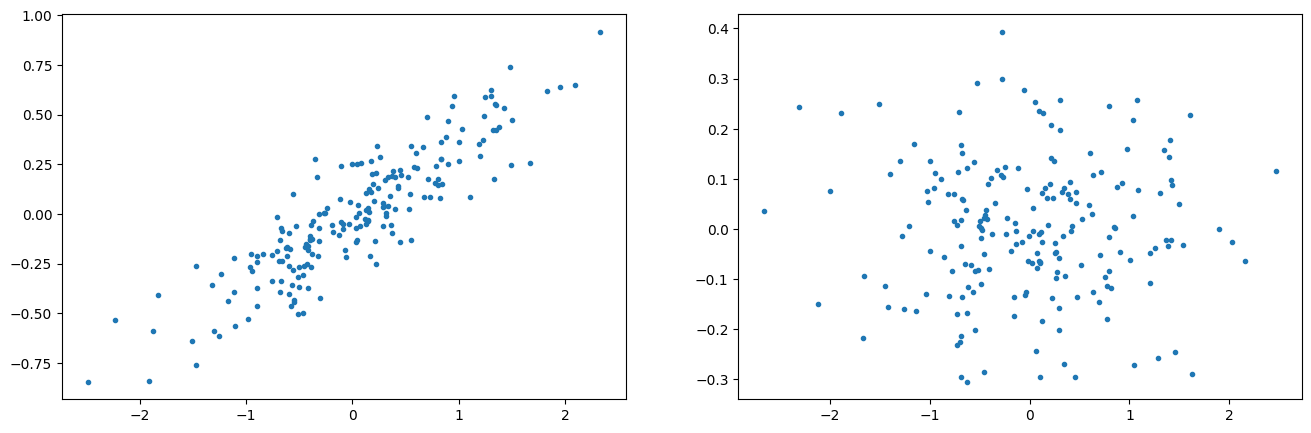

In [ ]:
# 相同的資料分別顯示在原始座標與PCA座標的差異

X_PCA = pca.transform(X)

plt.gcf().set_size_inches(16,5)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1],marker='.')

plt.subplot(122)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1],marker='.')

# Iris資料

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/Iris.csv')

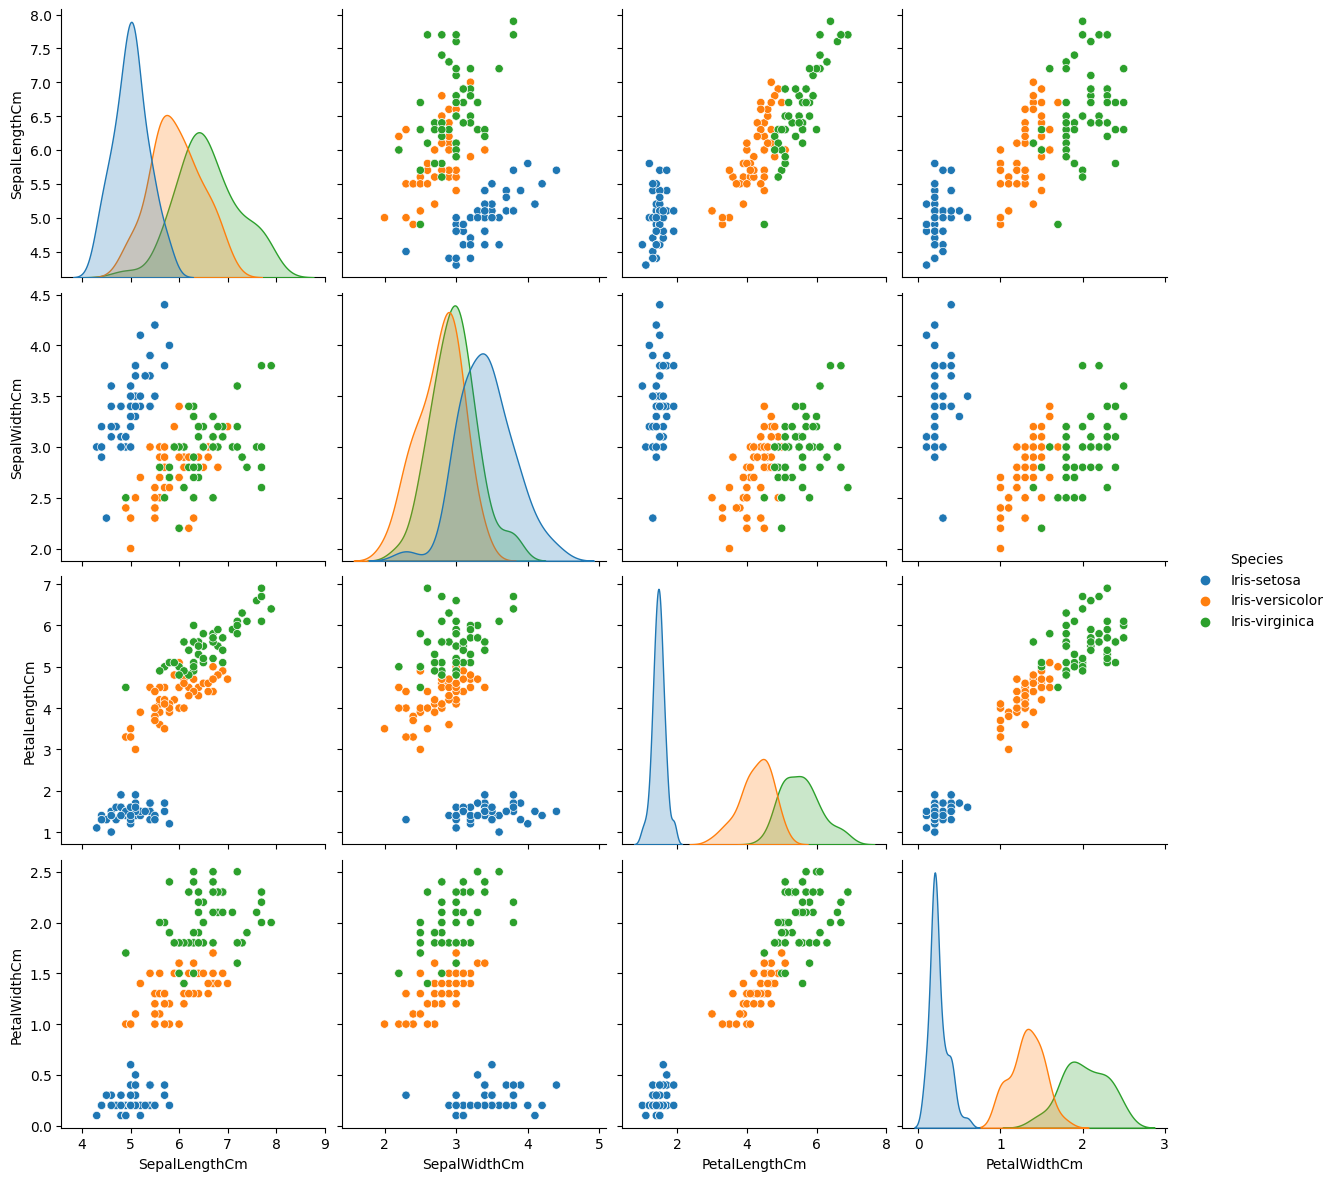

In [ ]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3)

### PCA

<Axes: xlabel='PCA1', ylabel='PCA2'>

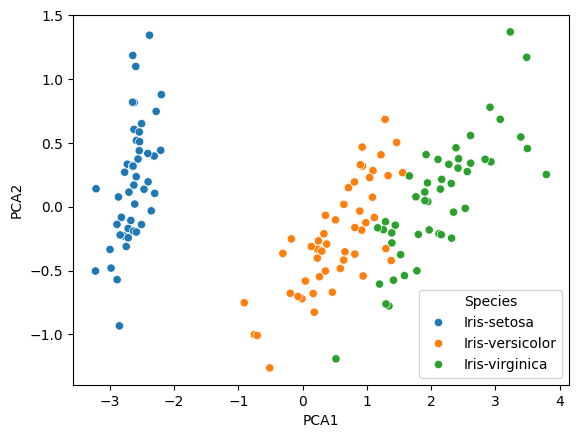

In [ ]:
from sklearn.decomposition import PCA
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
model = PCA(n_components=2)
model.fit(x)
x2 = model.transform(x)
data['PCA1'] = x2[:, 0]
data['PCA2'] = x2[:, 1]
sns.scatterplot(data, x="PCA1", y="PCA2", hue='Species')

### LDA

<Axes: xlabel='PCA1', ylabel='PCA2'>

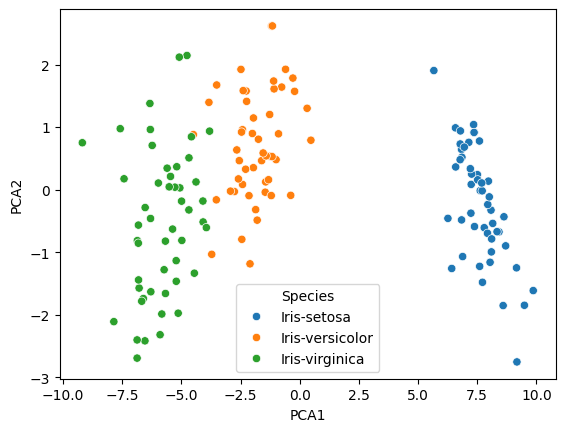

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
model = LinearDiscriminantAnalysis()
model.fit(x,data['Species'])
x2 = model.transform(x)
data['PCA1'] = x2[:, 0]
data['PCA2'] = x2[:, 1]
sns.scatterplot(data, x="PCA1", y="PCA2", hue='Species')

# 範例 Heart

In [ ]:
# 原始資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("../data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']

# model = SVC()
model = KNeighborsClassifier()
scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
0.643879781420765


In [ ]:
# StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("../data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
std = StandardScaler()
std.fit(x)
x_std = std.transform(x)

# model = SVC()
model = KNeighborsClassifier()
scores = cross_val_score(model,x_std,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.78688525 0.85245902 0.80327869 0.86666667 0.75      ]
0.8118579234972678


In [ ]:
# PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("../data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
pca = PCA()
pca.fit(x)
x_pca = pca.transform(x)

# model = SVC()
model = KNeighborsClassifier()
scores = cross_val_score(model,x_pca,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
0.643879781420765


In [ ]:
# LDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

data = pd.read_csv("../data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)
x_lda = lda.transform(x)

# model = SVC()
model = KNeighborsClassifier()
scores = cross_val_score(model,x_lda,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.7704918  0.90163934 0.80327869 0.85       0.76666667]
0.8184153005464483


# PCA降維
使用主成分分析（PCA）進行降維涉及將一個或多個最小的主成分歸零，從而得到一個較低維度的數據投影，同時保留最大數據方差。

以下是使用PCA作為降維變換的範例：

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

轉換後的數據已經被降維到單一維度。 為了理解這個降維的效果，我們可以對這些降維後的數據進行逆轉換，並將其與原始數據一起繪製出來：

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


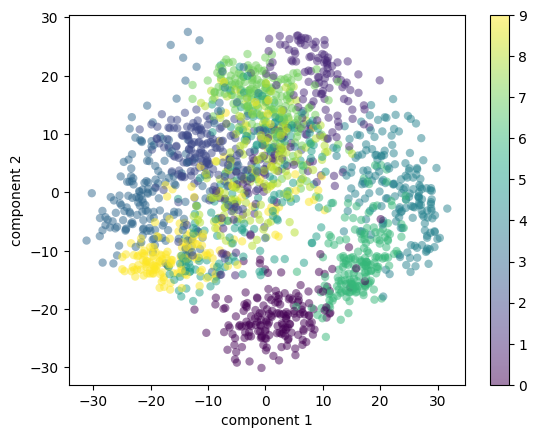

In [ ]:
# 將 64維的手寫文字投影套 2維空間
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

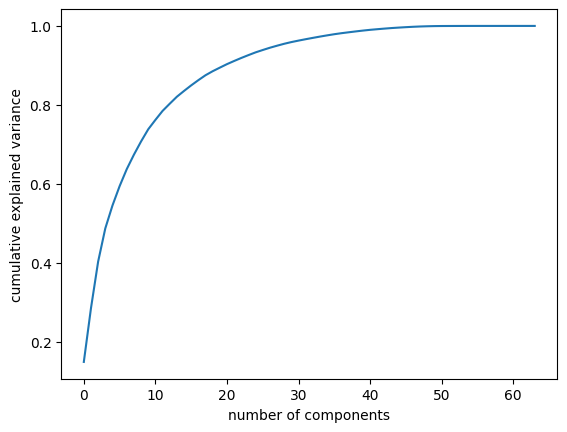

In [ ]:
# PCA 的越後面的座標解釋力越弱
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# PCA作為降躁
PCA也可以作為一種過濾噪聲數據的方法。 其基本思想是：任何方差遠大於噪聲影響的主成分應該不會受到噪聲的顯著影響。 因此，如果只使用最大的主成分子集來重構數據，應該能夠優先保留信號並去除噪聲。

讓我們來看看這在數字數據中的表現。 首先，我們將繪製幾個無噪聲的輸入數據：

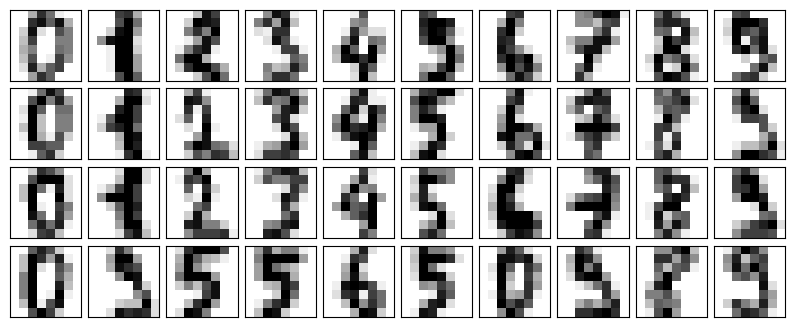

In [ ]:
# 原始的手寫數字圖像
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

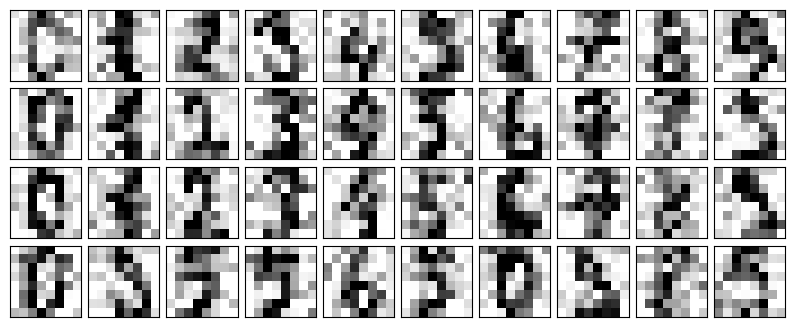

In [ ]:
# 故意將原始的手寫數字圖像加入雜訊
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

從目視上看，這些圖像顯然是有噪聲的，並且包含了無關的像素。 接下來，我們將對這些有噪聲的數據訓練PCA，並要求該投影保留50%的方差：

In [ ]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

np.int64(12)

在這裡，保留50%的方差意味著使用12個主成分。 接下來，我們計算這些主成分，然後使用變換的逆操作來重構過濾後的數字圖像：

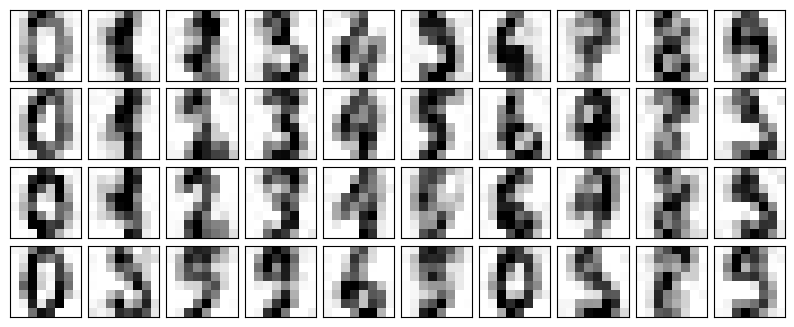

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)